# ТЕМА 3. 

Расширенные настройки приложений.

## Лекция. 


### Учебные вопросы

1. QSplashScreen + QMovie
2. Рисование в Qt
3. Использование QSS

## Источники

* Официальная документация: https://doc.qt.io/qtforpython/tutorials

* Прохоренок Н. А., Дронов В. А. Python 3 и PyQt 5. Разработка приложений. 2019 г. 

# 1. QSplashScreen + QMovie

## QSplashScreen

**QSplashScreen** - это виджет, который обычно отображается при запуске приложения. Заставки часто используются для приложений с длительным временем запуска (например, для баз данных или сетевых приложений, которым требуется время для установления соединений), чтобы предоставить пользователю информацию о том, что приложение загружается.

Наиболее распространенным использованием является отображение заставки перед отображением основного виджета на экране.

Для вывода заставки в Qt предназначен класс QSplashScreen (Из модуля QtWidgets), который позволяет сделать заставку:

```
<Объект> = QSplashScreen([<Изображение>][, flags=<Тип окна>[)
<Объект> = QSplashScreen(<Родитель>[, <Изображение>] [, flags=<Тип окна>])
```

Параметр <Родитель> позволяет указать ссылку на родительский компонент. В параметре <Изображение> указывается ссылка на изображение, которое будет отображаться на заставке. Конструктору класса QPixmap можно передать путь к файлу с изображением. Параметр flags предназначен для указание типа окна.


Класс QSplashScreen поддерживает следующие методы:

**show()** - отображает заставку;

**finish()** - закрывает заставку;

**showMessage()** - выводит сообшение в заставке;

**clearMessage()** - удаляет надпись;

**setPixmap()** - Изменяет изображение;

**pixmap()** - возвращает изображение виде экземпляра.



```python
"""
Демонстрация работы с QSplashScreen
"""
import time
from PySide6 import QtCore, QtWidgets, QtGui


class SplashScreen(QtWidgets.QSplashScreen):
    """
    Создание класса на базе QSplashScreen для отключения события mousePressEvent
    """

    def mousePressEvent(self, arg__1: QtGui.QMouseEvent) -> None:
        pass


class Window(QtWidgets.QWidget):
    def __init__(self, parent=None):
        super().__init__(parent)

        self.initUi()

    def initUi(self) -> None:
        """
        Инициализация Ui

        :return: None
        """

        self.pushButton = QtWidgets.QPushButton("Отмена")

        layout = QtWidgets.QVBoxLayout()
        layout.addWidget(self.pushButton)
        self.setLayout(layout)

        self.loadGUI()

    def loadGUI(self):
        """
        'Долгая' загрузка приложения

        :return: None
        """

        # splash = QtWidgets.QSplashScreen(QtGui.QPixmap("static/img/splash.jpg"))
        splash = SplashScreen(QtGui.QPixmap("static/img/splash.jpg"))
        splash.showMessage("Загрузка данных...     0%", QtCore.Qt.AlignHCenter | QtCore.Qt.AlignBottom, QtCore.Qt.white)
        splash.show()
        for _ in range(100):
            time.sleep(0.05)
            if (_ % 10) == 0:
                splash.showMessage(f"Загрузка данных...     {_}%", QtCore.Qt.AlignHCenter | QtCore.Qt.AlignVCenter, QtCore.Qt.white)

        splash.finish(self)
        self.show()


if __name__ == "__main__":
    app = QtWidgets.QApplication()

    myapp = Window()

    app.exec()
```

## QMovie

Этот класс используется для показа простых анимаций без звука.

Для использования:

1. Сначала необходимо создать объект `QMovie`, передав в конструктор либо имя файла, либо объект QMovie. 
> Можно использовать метод `isValid()`, чтобы проверить, действительны ли данные изображения, перед запуском `QMovie`. 

2. Чтобы запустить `QMovie`, вызовите start(). 
    > `QMovie` войдет в `running` состояние и выдаст `started()` и `stateChanged()` сигналы. 

    > Чтобы получить текущее состояние фильма, используйте `state()`.



**Пример:**

```python
label = QLabel()
movie = QMovie("animations/fire.gif ")
label.setMovie(фильм)
movie.start()
```

Всякий раз, когда в `QMovie` появляется новый кадр, он выдает сигнал `updated()`. Если размер кадра изменяется, то генерируется сигнал `resized()`. Когда `QMovie` закончен, генерируется сигнал `finished()`



**Методы QMovie:**

**setSpeed()** - управлять скоростью воспроизведения

**setPaused(bool)** - приостановка/запуск `QMovie`.

**setBackgroundColor()** - задать цвет или **backgroundColor()** получить текущий цвет фона.

**currentFrameNumber()** - возвращает порядковый номер текущего кадра. Первый кадр в анимации имеет порядковый номер 0. **frameCount()** возвращает общее количество кадров в анимации, если формат изображения поддерживает это. 

**supportedFormats()** - список поддерживаемых форматов.

```python
class LoadScreen(QtWidgets.QWidget):
    def __init__(self, parent=None):
        super().__init__(parent)
        self.initUi()

        # Таймер для вызова метода, для подгонки размера под родителя
        timer = QtCore.QTimer(self)
        timer.setInterval(10)
        timer.timeout.connect(lambda: self.resize(self.parent().size()))
        timer.start()

    def initUi(self) -> None:
        """
        Инициализация Ui

        :return: None
        """

        self.hide()  # скрываем по умолчанию

        # self.movie = QtGui.QMovie("static/gif/load_1.gif")
        self.movie = QtGui.QMovie("static/gif/load_2.gif")

        labelAnimation = QtWidgets.QLabel()
        labelAnimation.setAlignment(QtCore.Qt.AlignmentFlag.AlignCenter)
        labelAnimation.setMovie(self.movie)

        labelLoad = QtWidgets.QLabel("Идёт загрузка...")
        labelLoad.setAlignment(QtCore.Qt.AlignmentFlag.AlignCenter)

        layout = QtWidgets.QVBoxLayout()
        layout.addSpacerItem(QtWidgets.QSpacerItem(10, 20, QtWidgets.QSizePolicy.Policy.Expanding, QtWidgets.QSizePolicy.Policy.Expanding))
        layout.addWidget(labelAnimation)
        layout.addWidget(labelLoad)
        layout.addSpacerItem(QtWidgets.QSpacerItem(10, 20, QtWidgets.QSizePolicy.Policy.Expanding, QtWidgets.QSizePolicy.Policy.Expanding))
        layout.setContentsMargins(0, 0, 0, 0)

        self.setLayout(layout)

    def startAnimation(self) -> None:
        """
        Запуск анимации

        :return: None
        """

        self.show()
        self.parent().setEnabled(False)
        self.movie.start()

    def stopAnimation(self) -> None:
        """
        Остановка анимации

        :return: None
        """

        self.hide()
        self.parent().setEnabled(True)
        self.movie.stop()
```

# 3. Рисование в Qt

**QPainter** 

Для рисования различных элементов, используется класс **QPainter**. Он предоставляет высоко оптимизированные функции для обеспечения большинства требований по рисованию. Он может рисовать все, от простых линий до сложных фигур, таких как круговые диаграммы и прочее. Он также может рисовать выровненный текст и пиксельные изображения. Обычно он рисует в “естественной” системе координат. `QPainter` может работать с любым объектом, который наследует QPaintDeviceкласс.



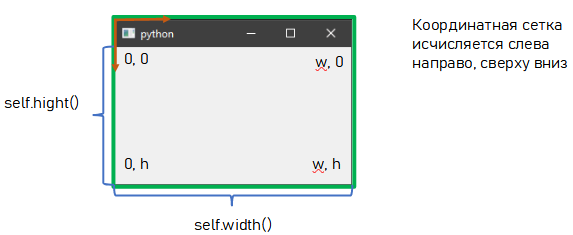

Основное применение:
* Рисование простых фигур;
* Создание собственных виджетов.

`QPainter` обычно используется внутри события рисования виджета: 

```python
def paintEvent(self, arg__0):

    painter = QPainter(self)
    painter.setPen(Qt.blue)
    painter.setFont(QFont("Arial", 30))
    painter.drawText(rect(), Qt.Выравнивание по центру,  "Qt")
```

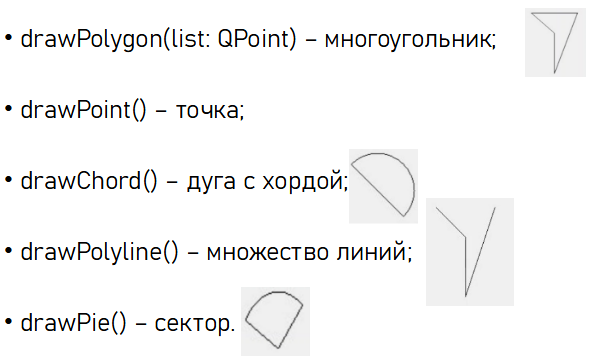

> Примеры кода для блока в репозитории в папке `scripts/Лекция 4/Часть 2/`

**QPen и QBrush**

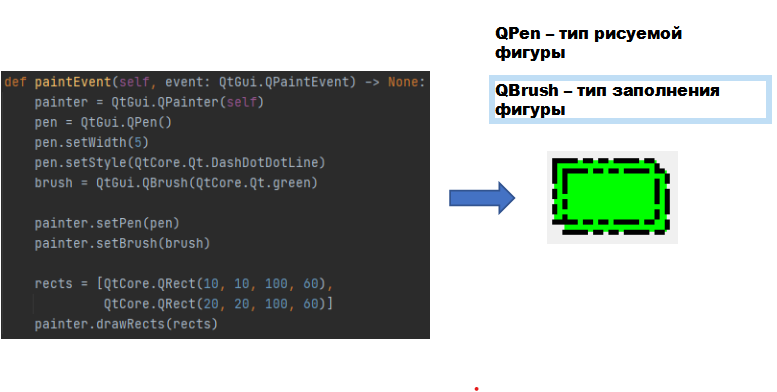

**Стили линий**

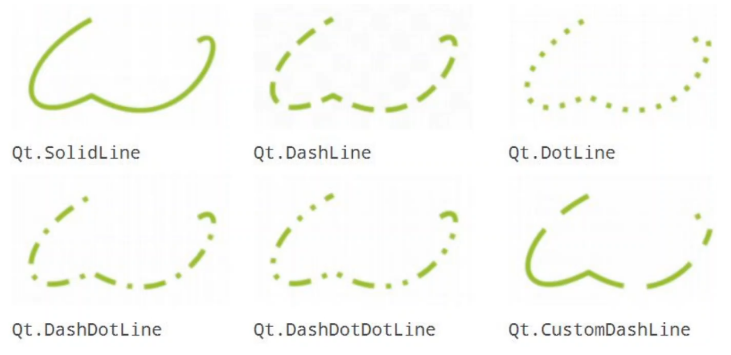

**Стили заливок**

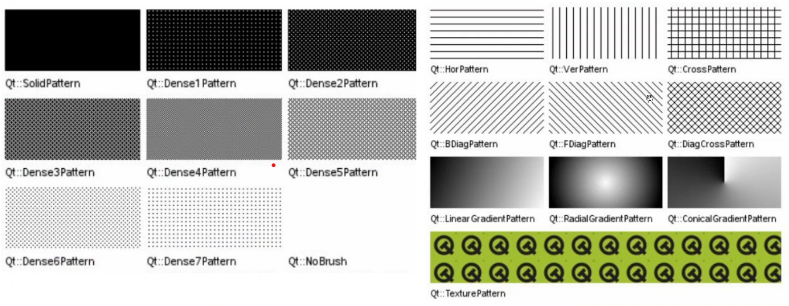